# 1. Operações com strings

In [70]:
var1 = "Amor"
var2 = "Ódio"
var3 = "Ainda que eu falasse a língua dos anjos"

print(var1 + var2)            # concatenação
print(var1 * 2)               # repetição
print(var1[1])                # fatiamento simples
print(var3[1:4])              # fatiamento por faixa
print('a' in var1)            # adesão
print(len(var1))              # tamanho
print(var1.replace('am','ia'))# substituição
print(var1.count('r'))        # enumeração
print(var3.split('língua'))   # divisão
print(var1.upper())           # maiúsculo
print(var1.lower())           # minúsculo

AmorÓdio
AmorAmor
m
ind
False
4
Amor
1
['Ainda que eu falasse a ', ' dos anjos']
AMOR
amor


# 2. Introdução a Expressões Regulares

In [71]:
import re

texto = "o bibliotecário abriu a biblioteca"
resultado = re.findall(r'biblio\w*', texto)
print(resultado)

texto2 = "uma pessoa boa"
match = re.search(r'pessoa', texto2)
print(match.group(0))

['bibliotecário', 'biblioteca']
pessoa


# 3. Listas, split e join

Demonstração de como quebrar uma string em tokens (via split ou regex) e unir listas de strings com join

In [72]:
import re

texto = "Algum tempo hesitei se devia abrir estas memórias."
tokens = re.split(r'[ \t\n]+', texto)
print(tokens)

# tokenização mais avançada
tokens2 = re.findall(r"\w+(?:[-’]\w+)*|’|[-.(]+|\S\w*", texto)
print(tokens2)

lista = ['Casa', ',', 'comida', 'e', 'roupa', 'lavada', '.']
print(lista[2], len(lista))

bras = ['Viva', 'pois', 'a', 'história']
print(' '.join(bras))
print(';'.join(bras))

['Algum', 'tempo', 'hesitei', 'se', 'devia', 'abrir', 'estas', 'memórias.']
['Algum', 'tempo', 'hesitei', 'se', 'devia', 'abrir', 'estas', 'memórias', '.']
comida 7
Viva pois a história
Viva;pois;a;história


# 4. Instalando e importando o NLTK

In [73]:
%pip install nltk

import nltk
nltk.download('all')


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\elias\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_dat

True

# 2. Trabalhando com o corpus “machado” e a classe Text

Carregar o corpus machado e explorar o texto cru e a classe Text para análises posteriores

In [74]:
from nltk.corpus import machado
print(machado.fileids())

raw_text = machado.raw('romance/marm05.txt')
print(raw_text[5600:5800])  # Print os primeiros 1000 caracteres do texto

from nltk.text import Text
bras = Text(machado.words('romance/marm05.txt'))

['contos/macn001.txt', 'contos/macn002.txt', 'contos/macn003.txt', 'contos/macn004.txt', 'contos/macn005.txt', 'contos/macn006.txt', 'contos/macn007.txt', 'contos/macn008.txt', 'contos/macn009.txt', 'contos/macn010.txt', 'contos/macn011.txt', 'contos/macn012.txt', 'contos/macn013.txt', 'contos/macn014.txt', 'contos/macn015.txt', 'contos/macn016.txt', 'contos/macn017.txt', 'contos/macn018.txt', 'contos/macn019.txt', 'contos/macn020.txt', 'contos/macn021.txt', 'contos/macn022.txt', 'contos/macn023.txt', 'contos/macn024.txt', 'contos/macn025.txt', 'contos/macn026.txt', 'contos/macn027.txt', 'contos/macn028.txt', 'contos/macn029.txt', 'contos/macn030.txt', 'contos/macn031.txt', 'contos/macn032.txt', 'contos/macn033.txt', 'contos/macn034.txt', 'contos/macn035.txt', 'contos/macn036.txt', 'contos/macn037.txt', 'contos/macn038.txt', 'contos/macn039.txt', 'contos/macn040.txt', 'contos/macn041.txt', 'contos/macn042.txt', 'contos/macn043.txt', 'contos/macn044.txt', 'contos/macn045.txt', 'contos/m

# 3. Retornar um texto como uma lista de tokens utilizando o método .words(id):

In [75]:
texto1 = machado.words('romance/marm05.txt')
print(texto1)

len(texto1)

['Romance', ',', 'Memórias', 'Póstumas', 'de', 'Brás', ...]


77098

# 4. Concordância, similaridade e colocações

Usamos métodos da classe Text para encontrar contextos de uma palavra (concordance), termos de distribuição similar (similar), padrões com regex (findall) e expressões frequentes (collocations)

In [76]:
# Concordância
bras.concordance('olhos')

Displaying 25 of 138 matches:
De pé , à cabeceira da cama , com os olhos estúpidos , a boca entreaberta , a t
orelhas . Pela minha parte fechei os olhos e deixei - me ir à ventura . Já agor
xões de cérebro enfermo . Como ia de olhos fechados , não via o caminho ; lembr
gelos eternos . Com efeito , abri os olhos e vi que o meu animal galopava numa 
me apareceu então , fitando - me uns olhos rutilantes como o sol . Tudo nessa f
 mim mesmo . Então , encarei - a com olhos súplices , e pedi mais alguns anos .
o alto de uma montanha . Inclinei os olhos a uma das vertentes , e contemplei ,
ilhão , e , não obstante , porque os olhos do delírio são outros , eu via tudo 
cifração da eternidade . E fixei os olhos , e continuei a ver as idades , que 
 esperto , concordava meu pai ; e os olhos babavam - se - lhe de orgulho , e el
te , e , repetido o mote , cravar os olhos na testa de uma senhora , depois tos
avrear de estômagos satisfeitos ; os olhos moles e úmidos , ou vivos e cálidos 
m estacado

In [77]:
# palavras de distribuição similar
bras.similar('chegar')

já leitor lhe dizer com menos contar deixei cheguei desferirem peito
corpo fazer porém ver casamento soltar quebrei titubear sacrifício


In [78]:
# findall com regex
bras.findall(r"<olhos> (<.*>)")

estúpidos; e; fechados; e; rutilantes; súplices; a; do; ,; babavam;
na; moles; se; da; umas; .; espraiavam; chamejantes; espetados; ,;
cobiçosos; para; ,; úmidos; no; ;; de; de; fitos; a; naquele; do; ,;
pretos; as; estúpidos; ao; às; ...; ,; fúlgidos; de; ,; .; de; pretos;
tão; de; para; a; chisparam; para; me; da; ,; ,; uma; no; na; para;
se; em; .; em; .; de; ,; no; nela; tinham; ;; cintilantes; o; dos; e;
,; de; de; dela; vermelhos; .; e; .; o; ,; constantemente; para; ,; ,;
para; ,; ao; ,; na; na; baixos; no; mais; no; se; dela; do; no; ,;
lampejantes; rasos; todos; ,; e; do; pelos; de; ao; .; lhe; de;
enfermos; :; ,; .; e; da; fixos; .; fitos; ,; ,; bonitos; de; ...; .;
de; algum; a; ;; fitos; em


In [79]:
# collocations (bigrama frequente)
bras.collocations()

Quincas Borba; Lobo Neves; alguma coisa; Brás Cubas; meu pai; que não;
dia seguinte; não sei; Com efeito; que era; Meu pai; alguns instantes;
outra vez; outra coisa; por exemplo; que ele; mim mesmo; coisa
nenhuma; mesma coisa; não era


# 5. Stopwords em Português

Stopwords são palavras que podem ser consideradas irrelevantes para o entendimento do sentiddo do texto. Ex.: as, os, e, para, entre outros. O NLTK possui uma lista de stopwords para o Português.
Extraímos a lista de palavras de parada (stopwords) em português, úteis para filtragem de tokens irrelevantes.

In [80]:
from nltk.corpus import stopwords

stopwords = nltk.corpus.stopwords.words('portuguese')
stopwords[:10]

['a',
 'à',
 'ao',
 'aos',
 'aquela',
 'aquelas',
 'aquele',
 'aqueles',
 'aquilo',
 'as']

# 6. Colocações e Bigramas/Bigrams

Com o bigrams, construímos pares de palavras consecutivas a partir de uma lista de tokens.

In [81]:
from nltk import bigrams

print(list(bigrams(['meu', 'coração', 'está', 'bem', 'machucado'])))

[('meu', 'coração'), ('coração', 'está'), ('está', 'bem'), ('bem', 'machucado')]


In [82]:
from nltk.corpus import machado
from nltk.text import Text

bras = Text(machado.words('romance/marm05.txt'))
bras.collocations()

Quincas Borba; Lobo Neves; alguma coisa; Brás Cubas; meu pai; que não;
dia seguinte; não sei; Com efeito; que era; Meu pai; alguns instantes;
outra vez; outra coisa; por exemplo; que ele; mim mesmo; coisa
nenhuma; mesma coisa; não era


# 7. Stemmers (RSLP)

Utilizamos o stemmer RSLP, próprio para português, para reduzir palavras à sua raiz.

In [83]:
stemmer = nltk.stem.RSLPStemmer()
print(stemmer.stem("copiar"))
print(stemmer.stem("paisagem"))


copi
pais


# 8. Tokenização com NLTK

Tokenizamos uma frase em palavras e pontuação usando o tokenizer padrão do NLTK.

In [84]:
import nltk

sentence = "Estou bem, mas não tenho certeza se viajarei amanhã às 8:30."
tokens = nltk.word_tokenize(sentence)
print(tokens)


['Estou', 'bem', ',', 'mas', 'não', 'tenho', 'certeza', 'se', 'viajarei', 'amanhã', 'às', '8:30', '.']


# 9. POS-tagging: tagger padrão e unigram

Treinamos um DefaultTagger que marca tudo como substantivo e um UnigramTagger baseado em sentenças etiquetadas do Mac-Morpho.

In [85]:
# Importa a biblioteca
# import nltk.corpus import mac_morpho -> No artigo o import está errado, o correto é:
from nltk.corpus import mac_morpho

# Carrega as sentença rotuladas do Corpus
sentencas_etiquetadas = mac_morpho.tagged_sents()
tags = [tag for (word, tag) in mac_morpho.tagged_words()]
nltk.FreqDist(tags).max()



'N'

In [86]:
# Baseline: atribui substantivo (N) a tudo
from nltk import DefaultTagger

etiqPadrao = DefaultTagger('N')
tokens_ex = nltk.word_tokenize("Exemplo de teste")
print(etiqPadrao.tag(tokens_ex))

# Unigram tagger treinado
unigram_tagger = nltk.tag.UnigramTagger(sentencas_etiquetadas)
texto = "A manhã está ensolarada"
tokens = nltk.word_tokenize(texto)
print(unigram_tagger.tag(tokens))

[('Exemplo', 'N'), ('de', 'N'), ('teste', 'N')]
[('A', 'ART'), ('manhã', 'N'), ('está', 'V'), ('ensolarada', 'ADJ')]


# 10. N-Gram Tagging

Combinamos taggers de ordem crescente (uni, bi e tri) usando backoff para melhorar a cobertura.

In [87]:
import nltk
tagged_sents = nltk.corpus.mac_morpho.tagged_sents()

t0 = nltk.DefaultTagger('N')
t1 = nltk.UnigramTagger(tagged_sents, backoff=t0)
t2 = nltk.BigramTagger(tagged_sents, backoff=t1)
t3 = nltk.TrigramTagger(tagged_sents, backoff=t2)

# 11. Salvando e Carregando um Tagger

Persistimos o TrigramTagger em disco com pickle e demonstramos como recarregá-lo.

In [88]:
import pickle

# Salvar
with open('mac_morpho', 'wb') as out:
    pickle.dump(t3, out, -1)
    
# Carregar
with open('mac_morpho', 'rb') as inp:
    tagger = pickle.load(inp)

# 12. Extração de Informação

In [89]:
sentences = nltk.sent_tokenize("Texto de exemplo")
sentences = [nltk.word_tokenize(sentence) for sentence in sentences]
sentences = [tagger.tag(sentence) for sentence in sentences]

# 13. Chunking

O tutorial original gera um erro porque o objeto Tree tenta renderizar SVG com svgling, que não está instalado. Substituímos a abordagem para usar diretamente RegexpParser importado e exibimos o resultado via print, evitando a representação SVG.

In [101]:
from nltk import RegexpParser

text = "João comprou um carro esportivo"
tokens = nltk.word_tokenize(text)
tagged = tagger.tag(tokens)



# define o padrão: substantivo seguido de adjetivos
gramatica = r"""PADRAO: {<N><ADJ>+}"""

# analiseGramatical = nltk.RegexpParser(gramatica)
# analiseGramatical.parse(tagged)
parser = RegexpParser(gramatica)
print(parser.parse(tagged))

(S João/NPROP comprou/V um/ART (PADRAO carro/N esportivo/ADJ))


## 13.1 Instalando svgling
Essa solução permite usar o código original do tutorial e obter a renderização SVG da árvore sintática. Basta instalar o pacote antes de executar:

In [102]:
%pip install svgling

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


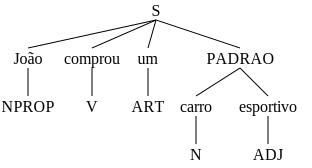

In [103]:
from nltk import RegexpParser

text = "João comprou um carro esportivo"
tokens = nltk.word_tokenize(text)
tagged = tagger.tag(tokens)

gramatica = r"""PADRAO: {<N><ADJ>+}"""
analiseGramatical = nltk.RegexpParser(gramatica)
analiseGramatical.parse(tagged)

# 14. Reconhecimento de Entidade Nomeada (NER)

O mesmo erro de SVG acontece no NER. Corrigimos usando RegexpParser importado e print para exibir a árvore.

In [105]:
text = ("O ministro Edson Fachin do Supremo Tribunal Federal "
        "determinou a separação do inquérito contra o presidente "
        "Michel Temer da investigação contra o senador afastado Aécio Neves.")

tokens = nltk.word_tokenize(text)
tagged = tagger.tag(tokens)



# define padrão de entidade nomeada
gramatica = r"""NE: {<NPROP>+}"""

# analiseGramatical = nltk.RegexpParser(gramatica)
# analiseGramatical.parse(tagged)
parser = RegexpParser(gramatica)
print(parser.parse(tagged))


(S
  O/ART
  ministro/N
  (NE Edson/NPROP)
  Fachin/N
  do/KS
  (NE Supremo/NPROP Tribunal/NPROP Federal/NPROP)
  determinou/V
  a/ART
  separação/N
  do/KS
  inquérito/N
  contra/PREP
  o/ART
  presidente/N
  (NE Michel/NPROP Temer/NPROP da/NPROP)
  investigação/N
  contra/PREP
  o/ART
  senador/N
  afastado/PCP
  (NE Aécio/NPROP Neves/NPROP ./NPROP))


## 14.1 Após instalar o svgling

Para renderizar a árvore em SVG como no tutorial original, instale o pacote svgling:

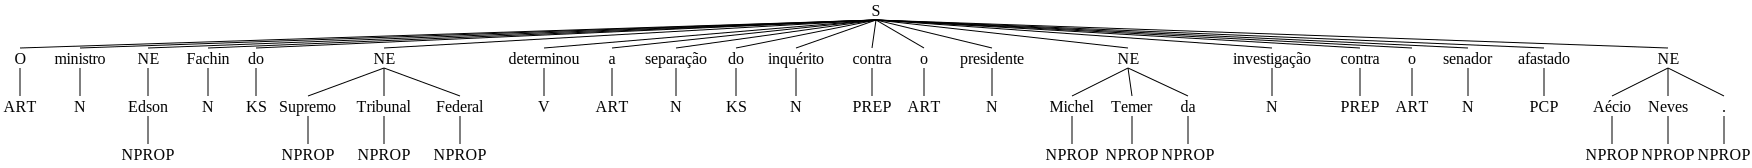

In [106]:
from nltk import RegexpParser

text = (
    "O ministro Edson Fachin do Supremo Tribunal Federal "
    "determinou a separação do inquérito contra o presidente "
    "Michel Temer da investigação contra o senador afastado Aécio Neves."
)

tokens = nltk.word_tokenize(text)
tagged = tagger.tag(tokens)

gramatica = r"""NE: {<NPROP>+}"""
analiseGramatical = nltk.RegexpParser(gramatica)
analiseGramatical.parse(tagged)

# Extração de Relações

No código original do tutorial, há um erro de digitação e uso de variável errada (analise em vez de analiseGramatical, e pase em vez de parse), resultando em NameError. Corrigimos instanciando o RegexpParser como parser e chamando print(parser.parse(...)).

In [ ]:
text = 'A estátua foi criada pelo escultor George Silva, que nasceu na Romênia'

tokens = nltk.word_tokenize(text)
tagged = tagger.tag(tokens)

# define entidades (NE) e relação (REL)
gramatica = r"""NE: {<NPROP>+}
                REL: {<NE> <.*>* <PREP.*> <.*>* <NE>}"""
                
                
# analiseGramatical = RegexpParser(gramatica)
# analise.pase(tagged)
parser = RegexpParser(gramatica)
print(parser.parse(tagged))


(S
  A/ART
  estátua/N
  foi/VAUX
  criada/PCP
  pelo/PDEN
  escultor/N
  (REL
    (NE George/NPROP Silva/NPROP)
    ,/,
    que/PRO-KS-REL
    nasceu/V
    na/PREP|+
    (NE Romênia/NPROP)))


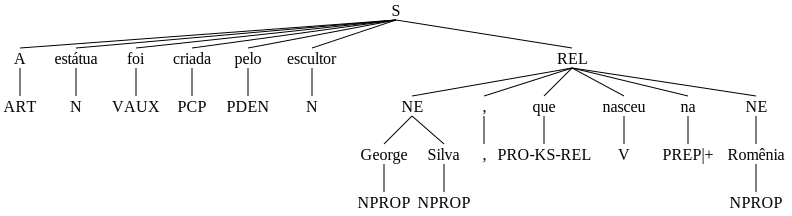

In [107]:
from nltk import RegexpParser

text = 'A estátua foi criada pelo escultor George Silva, que nasceu na Romênia'

tokens = nltk.word_tokenize(text)
tagged = tagger.tag(tokens)
gramatica = r"""
NE: {<NPROP>+}
REL: {<NE> <.*>* <PREP.*> <.*>* <NE>}
"""
analiseGramatical = RegexpParser(gramatica)
analiseGramatical.parse(tagged)